In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# parameters
C = 100  
p = 3  
lambda_poisson = 5
gamma = 2*p
delta = 0.5

# Poisson Distribution

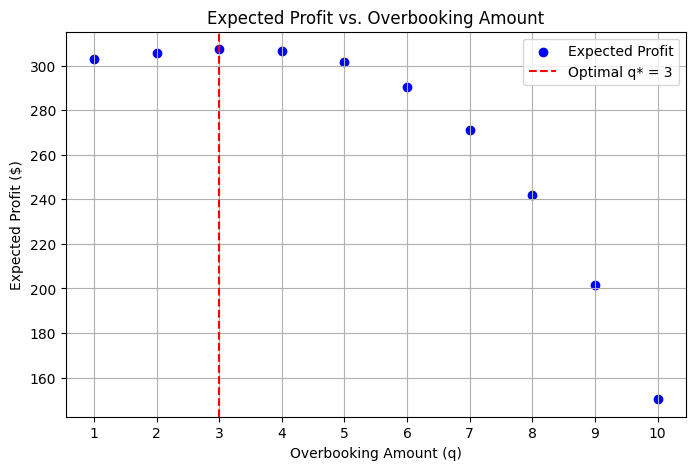

In [3]:
# Define the expected penalty function E_Y[(q - Y)_+]
def expected_penalty(q, lambda_poisson):
    """Computes E_Y[(q - Y)_+] for given q."""
    return sum((q - y)**2 * stats.poisson.pmf(y, mu=lambda_poisson) for y in range(q + 1))

# Define the expected profit function Pi(q)
def expected_profit(q, C, p, gamma, lambda_poisson):
    """Computes the expected profit function."""
    return p * (C + q) - gamma * expected_penalty(q, lambda_poisson)

# Generate values for q (overbooking limits) in range 0 to 20
q_values = np.arange(1, 11, 1)
profit_values = [expected_profit(q, C, p, gamma, lambda_poisson) for q in q_values]

# Find optimal q that maximizes profit
optimal_q = q_values[np.argmax(profit_values)]
max_profit = max(profit_values)

# Plot the expected profit function
plt.figure(figsize=(8, 5))
plt.scatter(q_values, profit_values, marker='o', color='blue', label="Expected Profit")
plt.axvline(optimal_q, color='red', linestyle='dashed', label=f"Optimal q* = {optimal_q}")
plt.xticks(q_values)  
plt.xlabel("Overbooking Amount (q)")
plt.ylabel("Expected Profit ($)")
plt.title("Expected Profit vs. Overbooking Amount")
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [4]:
exp_penalty = gamma * expected_penalty(optimal_q, lambda_poisson)
print(f"The expected penalty is ${exp_penalty:.2f}.")

The expected penalty is $1.68.


# Uniform Distribution

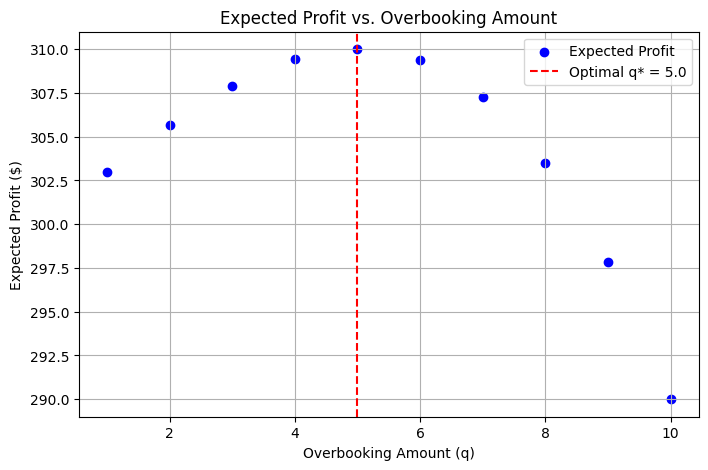

In [5]:
# Define the expected penalty function E_Y[(q - Y)_+]
def expected_penalty(q, delta, C):
    """Computes E_Y[(q - Y)_+] for given q."""
    return q**3 / (3 * delta*C)

# Define the expected profit function Pi(q)
def expected_profit(q, C, p, gamma, delta):
    """Computes the expected profit function."""
    return p * (C + q) - gamma * expected_penalty(q, delta, C)

# Generate values for q (overbooking limits) in range 0 to 20
qs = np.linspace(1, 10, 10)
profit_values = [expected_profit(q, C, p, gamma, delta) for q in qs]

# Find optimal q that maximizes profit
optimal_q = qs[np.argmax(profit_values)]
max_profit = max(profit_values)

# Plot the expected profit function
plt.figure(figsize=(8, 5))
plt.scatter(qs, profit_values, marker='o', color='blue', label="Expected Profit")
plt.axvline(optimal_q, color='red', linestyle='dashed', label=f"Optimal q* = {optimal_q}")
# plt.xticks(qs)  
plt.xlabel("Overbooking Amount (q)")
plt.ylabel("Expected Profit ($)")
plt.title("Expected Profit vs. Overbooking Amount")
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [6]:
exp_penalty = gamma * expected_penalty(optimal_q, delta, C)
print(f"The expected penalty is ${exp_penalty:.2f}.")

The expected penalty is $5.00.
